In [47]:
import pandas as pd

dataframe = pd.read_parquet("output/o1/00000")
dataframe.head()

,epoch,step,use_liger,per_device_train_batch_size,step_tokens_per_second,avg_tokens_per_second,step_peak_memory_allocated_MB,step_peak_memory_reserved_MB,total_peak_memory_allocated_MB,total_peak_memory_reserved_MB,run_number
1,0.000684,2,True,16,3582.36,3582.36,21881.46,28320.0,21881.46,28320.0,1
2,0.001025,3,True,16,7693.00,4888.38,21881.46,28320.0,21881.46,28320.0,1
3,0.001367,4,True,16,7666.97,5560.05,21881.46,28320.0,21881.46,28320.0,1
4,0.001709,5,True,16,7707.73,5976.36,21881.46,28320.0,21881.46,28320.0,1
5,0.002051,6,True,16,7672.15,6252.78,21881.46,28320.0,21881.46,28320.0,1


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from liger_kernel_finetuning import ExperimentArguments

In [65]:
history_columns = ["epoch", "step"]
metrics = [
    "step_tokens_per_second",
    "avg_tokens_per_second",
    "step_peak_memory_allocated_MB",
    "step_peak_memory_reserved_MB",
    "total_peak_memory_allocated_MB",
    "total_peak_memory_reserved_MB",
]
experiment_vars = [*ExperimentArguments.__dataclass_fields__]

analysis_df = (
    dataframe[["run_number"] + history_columns + experiment_vars + metrics].dropna().drop_duplicates()
)
# try converting experiment_vars to numeric types
for col in experiment_vars:
    analysis_df[col] = pd.to_numeric(analysis_df[col], errors="ignore", downcast="integer")

grpby = analysis_df.groupby(experiment_vars + ["run_number"])
avg_tokens_per_second = grpby.step_tokens_per_second.mean().to_frame()
step_peak_memory_reserved_mb = grpby.step_peak_memory_reserved_MB.max().to_frame()

/var/folders/4q/frdnh9l10h53gggw1m59gr9m0000gp/T/ipykernel_38324/4284937381.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  analysis_df[col] = pd.to_numeric(analysis_df[col], errors="ignore", downcast="integer")


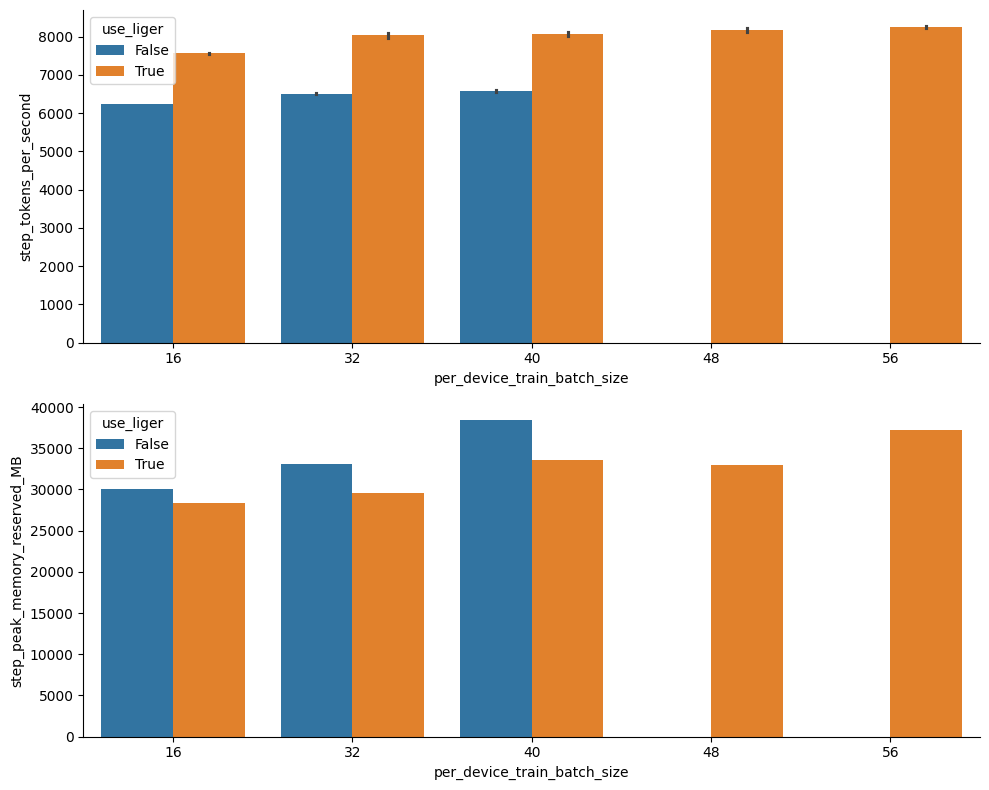

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# a seaborn barplot of avg_tokens_per_second and step_peak_memory_reserved_mb
# colored by use_liger in a single plot
sns.barplot(
    x="per_device_train_batch_size",
    y="step_tokens_per_second",
    hue="use_liger",
    data=avg_tokens_per_second.reset_index(),
    ax=ax[0]
)

sns.barplot(
    x="per_device_train_batch_size",
    y="step_peak_memory_reserved_MB",
    hue="use_liger",
    data=step_peak_memory_reserved_mb.reset_index(),
    ax=ax[1]
)

# remove border with seaborn
sns.despine()

fig.tight_layout()